Input Library

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb
from datetime import datetime, date
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Memasukkan fungsi dan Filter Data yg diuji

In [28]:
#fungsi datetime
def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')

In [29]:
os.chdir('/content/drive/My Drive/googlecolab')
dataset = pd.read_csv('covid_19_clean_complete.csv',date_parser=parser, parse_dates=[4])
dataset.head() #buka dataset dan dataset yang akan diuji

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [30]:
dataset.info()  #cek informasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [31]:
dataset['Country/Region'].unique() #melihat negara-negara yang ada di data

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

In [32]:
dataset = dataset.rename(columns={"Country/Region": "CountryRegion", "Province/State":"ProvinceState"}) #dirubah penamaan karena tidak bisa terbaca mesin

In [33]:
#filteringdata
filterdata = dataset[:261]
filterdata = filterdata.query('CountryRegion != "China"')
filterdata.sort_values('Confirmed', ascending=False).head()

,ProvinceState,CountryRegion,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
207,NaN,Thailand,15.870032,100.992541,2020-01-22,2,0,0,2,South-East Asia
137,NaN,Japan,36.204824,138.252924,2020-01-22,2,0,0,2,Western Pacific
223,NaN,US,40.000000,-100.000000,2020-01-22,1,0,0,1,Americas
205,NaN,Taiwan*,23.700000,121.000000,2020-01-22,1,0,0,1,Western Pacific
141,NaN,South Korea,35.907757,127.766922,2020-01-22,1,0,0,1,Western Pacific


In [34]:
dataset.tail()

,ProvinceState,CountryRegion,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [35]:

country_data = dataset.query('CountryRegion == "South Korea"')
country_data

,ProvinceState,CountryRegion,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
141,NaN,South Korea,35.907757,127.766922,2020-01-22,1,0,0,1,Western Pacific
402,NaN,South Korea,35.907757,127.766922,2020-01-23,1,0,0,1,Western Pacific
663,NaN,South Korea,35.907757,127.766922,2020-01-24,2,0,0,2,Western Pacific
924,NaN,South Korea,35.907757,127.766922,2020-01-25,2,0,0,2,Western Pacific
1185,NaN,South Korea,35.907757,127.766922,2020-01-26,3,0,0,3,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
47904,NaN,South Korea,35.907757,127.766922,2020-07-23,13979,298,12817,864,Western Pacific
48165,NaN,South Korea,35.907757,127.766922,2020-07-24,14092,298,12866,928,Western Pacific
48426,NaN,South Korea,35.907757,127.766922,2020-07-25,14150,298,12890,962,Western Pacific
48687,NaN,South Korea,35.907757,127.766922,2020-07-26,14175,299,12905,971,Western Pacific


In [36]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 141 to 48948
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ProvinceState  0 non-null      object        
 1   CountryRegion  188 non-null    object        
 2   Lat            188 non-null    float64       
 3   Long           188 non-null    float64       
 4   Date           188 non-null    datetime64[ns]
 5   Confirmed      188 non-null    int64         
 6   Deaths         188 non-null    int64         
 7   Recovered      188 non-null    int64         
 8   Active         188 non-null    int64         
 9   WHO Region     188 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 16.2+ KB


In [37]:
country_data.index = country_data['Date']

case = ['Confirmed', 'Deaths', 'Recovered', 'Active']
country_data = country_data.filter(items=case, axis=1)

In [38]:
country_data

,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-01-22,1,0,0,1
2020-01-23,1,0,0,1
2020-01-24,2,0,0,2
2020-01-25,2,0,0,2
2020-01-26,3,0,0,3
...,...,...,...,...
2020-07-23,13979,298,12817,864
2020-07-24,14092,298,12866,928
2020-07-25,14150,298,12890,962


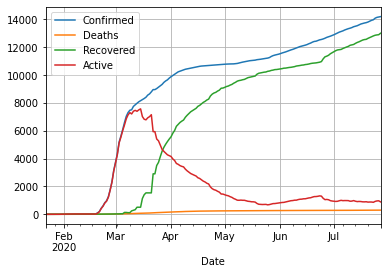

In [39]:

country_data.plot(grid=True)
plt.show()
#data plot kasus korona di korea selatan

In [40]:
#Menggunakan model dicky fuller 
from statsmodels.tsa.stattools import  adfuller

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
        return True
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [41]:
import random
#Menggunakan function random seed untuk pengujian data
def reset_random_seeds(seed_value=1):
   os.environ['PYTHONHASHSEED']=str(seed_value)
   tf.random.set_seed(seed_value)
   np.random.seed(seed_value)
   random.seed(seed_value)

In [42]:
#difference function
def difference(data, times=1):
  data_diff = data.diff()
  data_diff.dropna(inplace=True)
  if times == 0:
    return data
  elif times == 1:
    return data_diff
  else:
    for i in range(0,times-1):
      data_diff = data_diff.diff()
      data_diff.dropna(inplace=True)
    return data_diff

In [43]:
#Inverse difference function
def inverse_difference(series, differenced, times_diff):
  for n in range(1,times_diff+1):
    inverted = list()
    seed = difference(series,times_diff-n)[times_diff-n]
    inverted.append(seed)
    for i in range(len(differenced)):
	    value = inverted[i] + differenced[i]
	    inverted.append(value)
    differenced = pd.Series(inverted.copy())
  inverted_difference = differenced[1:].copy()
  return inverted_difference

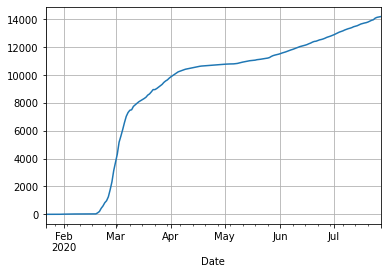

In [44]:
ts_data = country_data['Confirmed']
ts_data.plot(grid=True)
plt.show() #karena data univariate difilter 1 feature

Stationary test

In [45]:


diff_checker = 10

for times_diff in range(diff_checker+1):
  name = 'Differenced ' + str(times_diff) + ' times'
  adf_test = adfuller_test(difference(ts_data,times_diff), name=name)
  if adf_test:
    break
  print('\n')

    Augmented Dickey-Fuller Test on "Differenced 0 times" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.0484
 No. Lags Chosen       = 9
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.2657. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Differenced 1 times" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.5272
 No. Lags Chosen       = 8
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0073. Rejecting Null Hypothesis.
 => Series is Stationary.


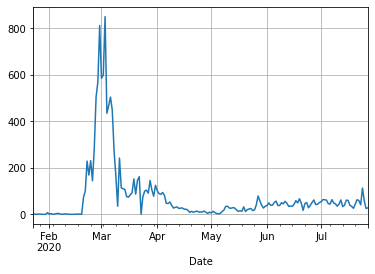

In [46]:

differencegrafik = difference(ts_data, times=times_diff)
differencegrafik.plot(grid=True)
plt.show()

Lag Test

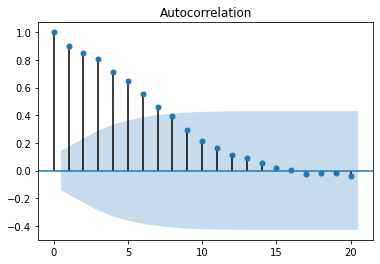

In [47]:
plot_acf(differencegrafik, lags=20, ax=plt.gca())
plt.show() #lag diangka 8

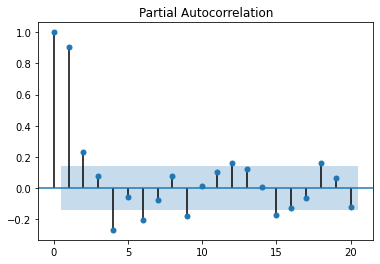

In [48]:
plot_pacf(differencegrafik, lags=20, ax=plt.gca())
plt.show() #lag diangka 3

In [49]:
lag=9

Supervised Value

In [50]:


supervised_df = pd.DataFrame(differencegrafik)
columns = [supervised_df.shift(lag+1-i) for i in range(1, lag+1)]
columns.append(supervised_df)
supervised_df = pd.concat(columns, axis=1)
supervised_df.fillna(0, inplace=True)
supervised_df.columns = range(lag+1)

supervised_df.head()

,0,1,2,3,4,5,6,7,8,9
Date,,,,,,,,,,
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [51]:
supervised_values = supervised_df.values #mendapatkan supervised values

Train Test Split& Scaling

In [52]:

train_size = int(0.8*(len(supervised_values)))

train_set = supervised_values[:train_size]
test_set = supervised_values[train_size:]

In [53]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_set)

train_scaled = scaler.transform(train_set)
test_scaled = scaler.transform(test_set)

feature_train, label_train = train_scaled[:, 0:-1], train_scaled[:, -1]
feature_test, label_test = test_scaled[:, 0:-1], test_scaled[:, -1]

Scaling

In [54]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.layers import Flatten, TimeDistributed
from tensorflow.keras.layers import ConvLSTM2D
from keras.layers.convolutional import Conv1D, MaxPooling1D

models = []

from tensorflow.keras.layers import LSTM

epoch = 1000
batch_size = 32

feature_train_reshaped = np.reshape(feature_train, (feature_train.shape[0], 1, feature_train.shape[1]))
feature_test_reshaped = np.reshape(feature_test, (feature_test.shape[0], 1, feature_test.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_dim=feature_train.shape[1]))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='SGD', loss='mean_squared_error')

lstm_model_history = lstm_model.fit(feature_train_reshaped, label_train, epochs=epoch, batch_size=batch_size, validation_data=(feature_test_reshaped, label_test))

Epoch 1/1000
5/5 [==============================] - 0s 47ms/step - loss: 0.6672 - val_loss: 0.5464
Epoch 2/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.4937 - val_loss: 0.3977
Epoch 3/1000
5/5 [==============================] - 0s 7ms/step - loss: 0.3745 - val_loss: 0.2884
Epoch 4/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.2882 - val_loss: 0.2107
Epoch 5/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.2270 - val_loss: 0.1546
Epoch 6/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.1833 - val_loss: 0.1138
Epoch 7/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.1520 - val_loss: 0.0840
Epoch 8/1000
5/5 [==============================] - 0s 7ms/step - loss: 0.1294 - val_loss: 0.0625
Epoch 9/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.1134 - val_loss: 0.0466
Epoch 10/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.1018 - val_loss: 0.0355
Epoch 11/1000
5/5 

In [55]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

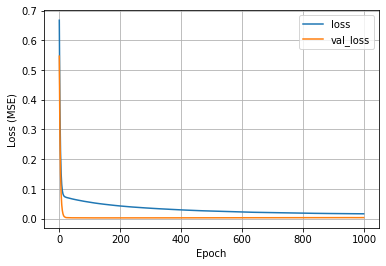

In [56]:
plot_loss(lstm_model_history)

In [57]:


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate_metrics(y_true, y_pred):
  r2 = r2_score(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)

  print("R^2 score :", '{:.5f}'.format(r2))
  print("MAE (Mean Absolute Error) :", '{:.5f}'.format(mae))
  print("MSE (Mean Squared Error) :", '{:.5f}'.format(mse))
  print("RMSE (Root Mean Squared Error) :", '{:.5f}'.format(rmse))

In [58]:

def inverse_scaling(series, scaler, test_scaled):
  temp = np.zeros((len(test_scaled), len(test_scaled[0])))
  temp[:, -1] = series.reshape(len(predictions))
  temp = scaler.inverse_transform(temp)
  inverted = temp[:, -1]
  return inverted

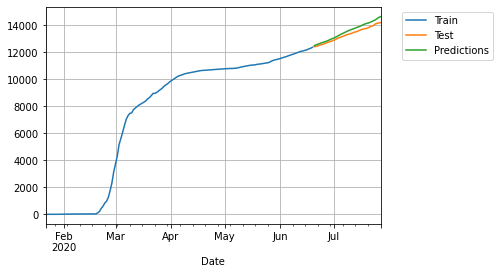

In [59]:

train_series = ts_data[:train_size+1]
test_series = ts_data[train_size+1:]

predictions = lstm_model.predict(feature_test_reshaped, verbose=0)
predictions = inverse_scaling(predictions, scaler, test_scaled)
predictions = inverse_difference(test_series, predictions, times_diff)
predictions.index = test_series.index

train_series.plot(label='Train')
test_series.plot(label='Test')
predictions.plot(label='Predictions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
print('\n')

In [60]:
test_series = ts_data[train_size+1:]



predictions = lstm_model.predict(feature_test_reshaped, verbose=0)
predictions = inverse_scaling(predictions, scaler, test_scaled)
predictions = inverse_difference(test_series, predictions, times_diff)
predictions.index = test_series.index

evaluate_metrics(test_series, predictions)

R^2 score : 0.77264
MAE (Mean Absolute Error) : 240.13904
MSE (Mean Squared Error) : 66510.00596
RMSE (Root Mean Squared Error) : 257.89534


In [61]:
neurons = 1
epoch = 1000
batch_size = 32

deeper_model = Sequential()
deeper_model.add(Dense(neurons, activation='relu', input_dim=feature_train.shape[1]))
deeper_model.add(Dense(5, activation='relu'))
deeper_model.add(Dense(1))
deeper_model.compile(loss='mean_squared_error', optimizer='SGD')
deeper_model_history = deeper_model.fit(feature_train, label_train, epochs=epoch, batch_size=batch_size, validation_data=(feature_test, label_test))

Epoch 1/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.8185 - val_loss: 0.7228
Epoch 2/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.6657 - val_loss: 0.5846
Epoch 3/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.5527 - val_loss: 0.4770
Epoch 4/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.4649 - val_loss: 0.3923
Epoch 5/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.3965 - val_loss: 0.3251
Epoch 6/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.3430 - val_loss: 0.2716
Epoch 7/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.3007 - val_loss: 0.2272
Epoch 8/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.2661 - val_loss: 0.1917
Epoch 9/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.2390 - val_loss: 0.1623
Epoch 10/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.2169 - val_loss: 0.1383
Epoch 11/1000
5/5 

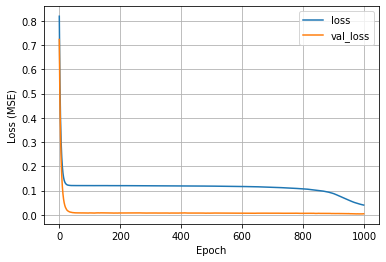

In [62]:
plot_loss(deeper_model_history)

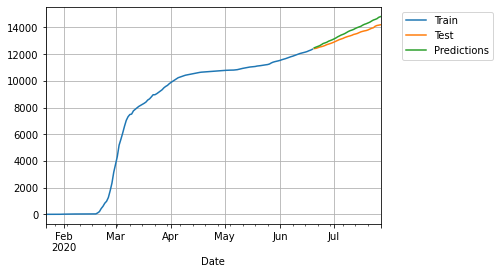

In [63]:

train_series = ts_data[:train_size+1]
test_series = ts_data[train_size+1:]

predictions = deeper_model.predict(feature_test_reshaped, verbose=0)
predictions = inverse_scaling(predictions, scaler, test_scaled)
# Inverse difference
predictions = inverse_difference(test_series, predictions, times_diff)
# Index = datetime
predictions.index = test_series.index
# Plot
train_series.plot(label='Train')
test_series.plot(label='Test')
predictions.plot(label='Predictions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
print('\n')

In [64]:
test_series = ts_data[train_size+1:]


predictions = deeper_model.predict(feature_test_reshaped, verbose=0)
predictions = inverse_scaling(predictions, scaler, test_scaled)
predictions = inverse_difference(test_series, predictions, times_diff)
predictions.index = test_series.index
evaluate_metrics(test_series, predictions)

R^2 score : 0.51691
MAE (Mean Absolute Error) : 343.21218
MSE (Mean Squared Error) : 141318.18318
RMSE (Root Mean Squared Error) : 375.92311


In [65]:
neurons = 50
epoch = 1000
batch_size = 32

wider_model = Sequential()
wider_model.add(Dense(neurons, activation='relu', input_dim=feature_train.shape[1]))
wider_model.add(Dense(1))
wider_model.compile(loss='mean_squared_error', optimizer='SGD')
wider_model_history = wider_model.fit(feature_train, label_train, epochs=epoch, batch_size=batch_size, validation_data=(feature_test, label_test))

Epoch 1/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.6374 - val_loss: 0.0776
Epoch 2/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.1201 - val_loss: 0.0078
Epoch 3/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0904 - val_loss: 0.0025
Epoch 4/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0868 - val_loss: 0.0020
Epoch 5/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0854 - val_loss: 0.0019
Epoch 6/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0835 - val_loss: 0.0020
Epoch 7/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0821 - val_loss: 0.0020
Epoch 8/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0808 - val_loss: 0.0020
Epoch 9/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0792 - val_loss: 0.0019
Epoch 10/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0779 - val_loss: 0.0018
Epoch 11/1000
5/5 

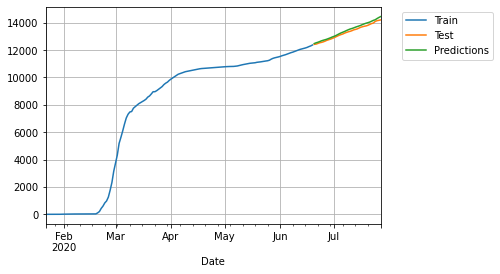

In [66]:

train_series = ts_data[:train_size+1]
test_series = ts_data[train_size+1:]

predictions = wider_model.predict(feature_test_reshaped, verbose=0)
predictions = inverse_scaling(predictions, scaler, test_scaled)
# Inverse difference
predictions = inverse_difference(test_series, predictions, times_diff)
# Index = datetime
predictions.index = test_series.index
# Plot
train_series.plot(label='Train')
test_series.plot(label='Test')
predictions.plot(label='Predictions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
print('\n')

In [67]:
test_series = ts_data[train_size+1:]


predictions = deeper_model.predict(feature_test_reshaped, verbose=0)
predictions = inverse_scaling(predictions, scaler, test_scaled)
predictions = inverse_difference(test_series, predictions, times_diff)
predictions.index = test_series.index
evaluate_metrics(test_series, predictions)

R^2 score : 0.51691
MAE (Mean Absolute Error) : 343.21218
MSE (Mean Squared Error) : 141318.18318
RMSE (Root Mean Squared Error) : 375.92311
